In [66]:
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score;


#Setting up breast cancer dataset

breast = load_breast_cancer() 
breast_data = breast.data 
breast_data.shape 

breast_input = pd.DataFrame(breast_data)
breast_input.head() 

breast_labels = breast.target 

labels = np.reshape(breast_labels,(569,1)) 
final_breast_data = np.concatenate([breast_data,labels],axis=1) 
final_breast_data.shape


breast_dataset = pd.DataFrame(final_breast_data) 
features = breast.feature_names 

features_labels = np.append(features,'label') 

breast_dataset.columns = features_labels



Accuracy: 0.9824561403508771
Precision: 0.972972972972973
Recall: 1.0


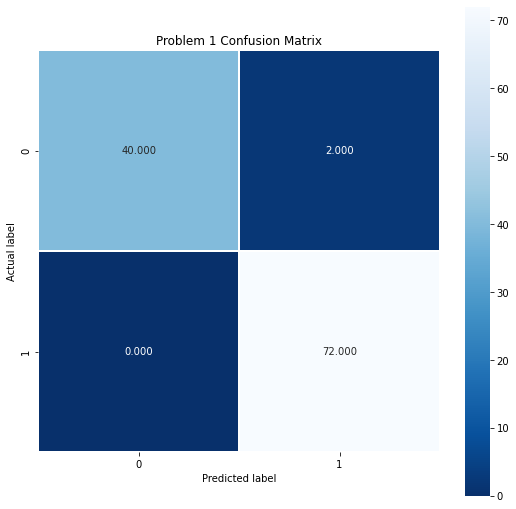

In [70]:
#Training for Problem 1

logisticRegr = LogisticRegression()
scaler = StandardScaler()

X = breast_dataset.iloc[:, 0 : 30].values
Y = breast_dataset.iloc[:, 30].values

random = np.random.seed(45)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = random)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logisticRegr.fit(X_train, Y_train)

predictions = logisticRegr.predict(X_test)

cm = metrics.confusion_matrix(Y_test, predictions)

#Plotting confusion matrix

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Problem 1 Confusion Matrix')

#Calculating accuracy, precisioin, and recall

accuracy = accuracy_score(Y_test, predictions);
precision = precision_score(Y_test, predictions);
recall = recall_score(Y_test, predictions);

print("Accuracy: " + str(accuracy));
print("Precision: " + str(precision));
print("Recall: " + str(recall));


Accuracy: 0.9649122807017544
Precision: 0.9594594594594594
Recall: 0.9861111111111112


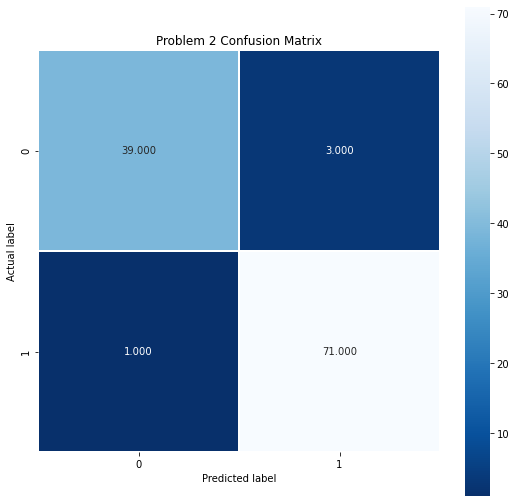

In [87]:
#Training for Problem 2


LogisticRegr = LogisticRegression()
scaler = StandardScaler()

X = breast_dataset.iloc[:, 0 : 30].values
Y = breast_dataset.iloc[:, 30].values

random = np.random.seed(45)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = random)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=3) 
principalComponents = pca.fit_transform(X_train) 
principalComponentsTest = pca.fit_transform(X_test)

logisticRegr.fit(principalComponents, Y_train)

predictions = logisticRegr.predict(principalComponentsTest)

cm = metrics.confusion_matrix(Y_test, predictions)

#Plotting confusion matrix

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Problem 2 Confusion Matrix')


#Calculating accuracy, precisioin, and recall

accuracy = accuracy_score(Y_test, predictions);
precision = precision_score(Y_test, predictions);
recall = recall_score(Y_test, predictions);

print("Accuracy: " + str(accuracy));
print("Precision: " + str(precision));
print("Recall: " + str(recall));





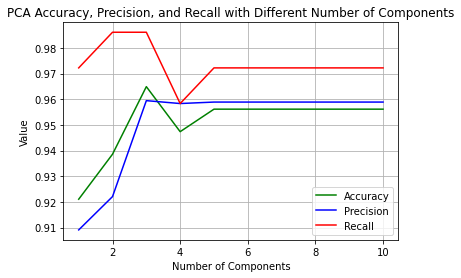

In [96]:
#Plotting accuracy, precision, and recall at different number of
#components for PCA in problem 2

accuracyMatrix = [];
precisionMatrix = [];
recallMatrix = [];

#For loop to go through different number of components
for i in range(10):
    pca = PCA(n_components = i + 1)
    principalComponents = pca.fit_transform(X_train) 
    principalComponentsTest = pca.fit_transform(X_test)
    logisticRegr.fit(principalComponents, Y_train)
    predictions = logisticRegr.predict(principalComponentsTest)
    accuracyMatrix.append(accuracy_score(Y_test, predictions))
    precisionMatrix.append(precision_score(Y_test, predictions));
    recallMatrix.append(recall_score(Y_test, predictions));
    
    
numComponents = np.arange(1, 11);    

plt.plot(numComponents, accuracyMatrix, color= 'green', label = 'Accuracy')
plt.plot(numComponents, precisionMatrix, color= 'blue', label = 'Precision')
plt.plot(numComponents, recallMatrix, color= 'red', label = 'Recall')

plt.title('PCA Accuracy, Precision, and Recall with Different Number of Components')
plt.xlabel("Number of Components")
plt.ylabel("Value")
plt.grid()
plt.legend();


Accuracy: 0.9736842105263158
Precision: 0.96
Recall: 1.0


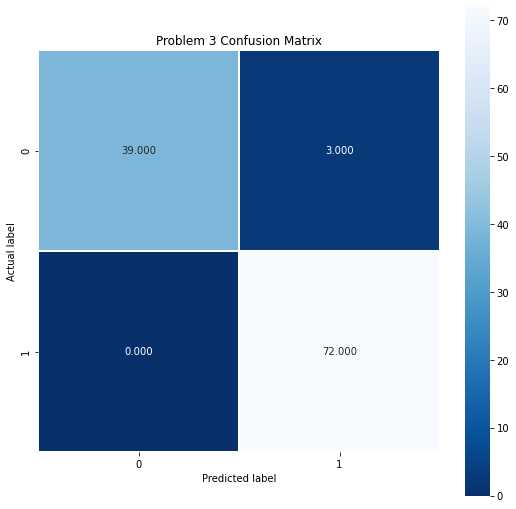

In [97]:
#Training for Problem 3

LogisticRegr = LogisticRegression()
scaler = StandardScaler()

X = breast_dataset.iloc[:, 0 : 30].values
Y = breast_dataset.iloc[:, 30].values

random = np.random.seed(45)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = random)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lda = LinearDiscriminantAnalysis(n_components=1) 

lda.fit(X_train,Y_train) 
predictions = lda.predict(X_test) 

cm = metrics.confusion_matrix(Y_test, predictions)


plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Problem 3 Confusion Matrix')

accuracy = accuracy_score(Y_test, predictions);
precision = precision_score(Y_test, predictions);
recall = recall_score(Y_test, predictions);


#Calculating accuracy, precisioin, and recall

print("Accuracy: " + str(accuracy));
print("Precision: " + str(precision));
print("Recall: " + str(recall));